In [1]:
import pandas as pd
import os.path
import os
import h5py
import numpy as np
import tqdm
import itertools
import matplotlib.pyplot as plt
from matplotlib import colors

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
    torch.cuda.empty_cache()
if device.type == 'cpu':
    print("Using cpu")

In [2]:
from data import (SpectraDataset, preprocess_dataset, prepare_dataset_scalers)

In [3]:
# check if data has nans or spectra <= 0
# preprocess_dataset(data_dir=os.getcwd()+'/',
#                    fname_x = "X_afgpy.h5",
#                    fname_y = "Y_afgpy.h5")

# prepare files for normalization and training
# prepare_dataset_scalers(data_dir=os.getcwd()+'/',
#                         out_dir=os.getcwd()+'/',
#                         fname_x = "X_afgpy.h5",
#                         fname_y = "Y_afgpy.h5")

# initialize dataset loader
data = SpectraDataset(working_dir=os.getcwd()+'/')

# load dataset
data.load_and_normalize_data(data_dir=None, limit=None, fname_x = "X_afgpy.h5", fname_y = "Y_afgpy.h5")

KeyboardInterrupt: 

Text(0.5, 1.0, 'Data distribution')

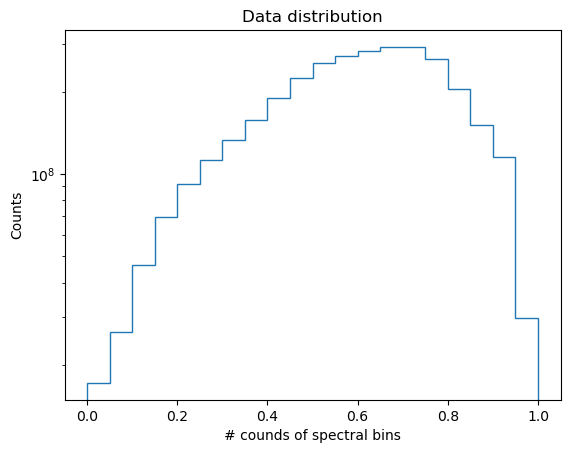

In [4]:
counts, bins = np.histogram(data.X_norm, bins=20)
plt.stairs(counts, bins)
plt.yscale("log")
plt.xlabel("# counds of spectral bins")
plt.ylabel("Counts")
plt.title("Data distribution")

In [5]:
print(data.X_norm.shape, data.X_norm.shape[0]/(data.X_norm.shape[1]*data.X_norm.shape[2]))

(393216, 128, 64) 48.0


# Create subset of actual data for testing/debuggin

[1368, 4648, 4196, 5631, 4155, 6161, 8175, 7522, 2256, 6944, 5107, 8033, 1866, 5742, 7618, 4448, 5217, 5672, 1748, 634, 1944, 1758, 3009, 7046, 3110, 8161, 6803, 2906, 1858, 3969, 7010, 5753, 4912, 6448, 856, 5579, 6804, 4810, 7449, 4392, 3520, 1638, 4770, 7736, 428, 3800, 11, 4411, 2086, 5923, 7289, 3977, 7822, 5173, 2749, 6747, 5880, 2695, 7655, 3038, 5288, 8084, 7110, 220, 7705, 8188, 2993, 7477, 2516, 2744, 994, 249, 4015, 5759, 2681, 408, 2432, 5435, 5949, 1790, 1872, 997, 6124, 1408, 405, 2209, 1803, 857, 2053, 5985, 4915, 986, 2131, 6605, 2328, 5814, 1894, 338, 7264, 6365, 3634, 131, 6828, 2536, 1360, 7749, 295, 84, 5988, 7419, 1239, 7182, 3366, 1278, 846, 7389, 4564, 1259, 363, 1804, 4691, 744, 2363, 5234, 5713, 6301, 7594, 2959, 4489, 4562, 4500, 2750, 4902, 5099, 5422, 790, 2030, 7849, 7039, 3127, 5928, 5332, 5582, 7869, 6989, 6206, 3825, 2459, 3609, 3754, 6289, 5732, 6645, 7838, 3024, 4775, 7395, 7958, 1833, 5399, 3749, 6787, 4927, 4201, 5783, 5541, 3501, 5438, 7431, 6451, 1

In [16]:
# lim = 100 * len(data.times) * len(data.freqs)
# indices = list(range(lim))
# np.random.shuffle(indices)
lim = 1000
indices = list(range(len(data.X)))
np.random.shuffle(indices)
indices = indices[:lim]
# print(indices[:lim])

with h5py.File(data.working_dir+"X.h5","w") as f:
    f.create_dataset(name="X", data=data.X[indices])
    f.create_dataset(name="times", data=data.times)
    f.create_dataset(name="freqs", data=data.freqs)
with h5py.File(data.working_dir+"Y.h5","w") as f:
    f.create_dataset(name="Y", data=data.y[indices])
    f.create_dataset(name="keys", data=np.array(list(data.feature_names),dtype="S"))